In [1]:
#!pip install mysql-connector-python


In [1]:
import mysql.connector
import pandas as pd

# Connect to MySQL
conn = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="mywork@keshi",
    database="cryptodb"
)

cursor = conn.cursor()

# Fetch Bitcoin dataset from MySQL
#query = "SELECT timestamp, open, high, low, close, volume FROM cryptocurrency_data;"
query = """
SELECT timestamp, open, high, low, close, volume 
FROM cryptocurrency_data
WHERE DATE >= '2025-01-23' AND DATE <= '2025-03-25';
"""  
cursor.execute(query)

# Convert to DataFrame
columns = [desc[0] for desc in cursor.description]
bitcoin_df = pd.DataFrame(cursor.fetchall(), columns=columns)

print(" Bitcoin data loaded from MySQL!")
cursor.close()
conn.close()


 Bitcoin data loaded from MySQL!


In [2]:
bitcoin_df

,timestamp,open,high,low,close,volume
0,1737590400,103692.100401,106864.395294,101281.800811,103962.596579,646479.429901
1,1737676800,103962.596579,107167.694901,102810.892785,104906.678715,316407.952257
2,1737763200,104906.678715,105305.645175,104125.337007,104374.679337,60461.993852
3,1737849600,104796.454152,105485.726408,102504.239015,102606.795576,119015.245020
4,1737936000,102606.795576,103220.280980,97832.534975,102090.565306,562236.058121
...,...,...,...,...,...,...
57,1742515200,84205.689976,84815.160113,83193.247170,84040.614856,119396.321485
58,1742601600,84083.697385,84519.624728,83989.037477,84266.098276,55106.243183
59,1742688000,83859.677032,85415.127983,83832.173140,84854.333324,67744.112859
60,1742774400,86108.345935,88738.700606,85571.836409,88244.723491,193127.583725


In [3]:
# Define mapping for mismatched columns
rename_dict = {
    'open': 'OPEN',
    'high': 'HIGH',
    'low': 'LOW',
    'volume': 'VOLUME',
    'close':'CLOSE'
    
}

# Rename only the mismatched columns
bitcoin_df.rename(columns=rename_dict, inplace=True)


In [4]:
import pandas as pd

def func_pre(df2):
    print("Before Processing:")
    print(df2.head())  # Check initial data

    df2['timestamp'] = pd.to_datetime(df2['timestamp'], unit='s')

    df2['mid_trend_d'] = df2['CLOSE'].rolling(window=20).mean()
    df2['weight_mid_t_d'] = df2['CLOSE'].ewm(span=20, adjust=False).mean()

    df2['market_up_down'] = df2['OPEN'] - df2['CLOSE']
    df2['price_fluctuations'] = df2['HIGH'] - df2['LOW']
    df2['upper_markert_analysis'] = df2['HIGH'] - df2['OPEN']
    df2['down_markert_analysis'] = df2['CLOSE'] - df2['LOW']

    df2['short_trend_d'] = df2['CLOSE'].rolling(window=14).mean()
    df2['short_trend_d_var'] = df2['CLOSE'].rolling(window=14).std()

    df2['close_p_change'] = df2['CLOSE'].pct_change()
    df2['volume_past_direction'] = df2['VOLUME'].rolling(window=14).mean()
    df2['Volume_Change'] = df2['VOLUME'].pct_change()

    df2['OPEN_lag1'] = df2['OPEN'].shift(1)
    df2['CLOSE_lag1'] = df2['CLOSE'].shift(1)
    df2['HIGH_lag1'] = df2['HIGH'].shift(1)
    df2['LOW_lag1'] = df2['LOW'].shift(1)
    
 

    print("Missing Values Before Dropna:")
    print(df2.isnull().sum())  # Check NaN count

    if len(df2) < 20:
        print("Warning: Not enough data for rolling calculations!")

    df2.dropna(inplace=True)

    print("After Processing:")
    print(df2.head())

    return df2


In [5]:
final_df=func_pre(bitcoin_df)

Before Processing:
    timestamp           OPEN           HIGH            LOW          CLOSE  \
0  1737590400  103692.100401  106864.395294  101281.800811  103962.596579   
1  1737676800  103962.596579  107167.694901  102810.892785  104906.678715   
2  1737763200  104906.678715  105305.645175  104125.337007  104374.679337   
3  1737849600  104796.454152  105485.726408  102504.239015  102606.795576   
4  1737936000  102606.795576  103220.280980   97832.534975  102090.565306   

          VOLUME  
0  646479.429901  
1  316407.952257  
2   60461.993852  
3  119015.245020  
4  562236.058121  
Missing Values Before Dropna:
timestamp                  0
OPEN                       0
HIGH                       0
LOW                        0
CLOSE                      0
VOLUME                     0
mid_trend_d               19
weight_mid_t_d             0
market_up_down             0
price_fluctuations         0
upper_markert_analysis     0
down_markert_analysis      0
short_trend_d             

In [6]:
final_df.columns


Index(['timestamp', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'mid_trend_d',
       'weight_mid_t_d', 'market_up_down', 'price_fluctuations',
       'upper_markert_analysis', 'down_markert_analysis', 'short_trend_d',
       'short_trend_d_var', 'close_p_change', 'volume_past_direction',
       'Volume_Change', 'OPEN_lag1', 'CLOSE_lag1', 'HIGH_lag1', 'LOW_lag1'],
      dtype='object')

In [7]:
final_df.shape

(43, 21)

In [8]:
final_df=final_df.drop(columns=['timestamp'])

In [9]:
final_df.shape

(43, 20)

In [10]:
#import numpy as np

#final_df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert inf to NaN
#final_df.fillna(final_df["Volume_Change"].median(), inplace=True)  # Fill with median


In [11]:
final_df

,OPEN,HIGH,LOW,CLOSE,VOLUME,mid_trend_d,weight_mid_t_d,market_up_down,price_fluctuations,upper_markert_analysis,down_markert_analysis,short_trend_d,short_trend_d_var,close_p_change,volume_past_direction,Volume_Change,OPEN_lag1,CLOSE_lag1,HIGH_lag1,LOW_lag1
19,97490.299171,98528.737844,95686.021583,95703.501453,172348.603189,100340.803878,99451.287306,1786.797718,2842.716261,1038.438674,17.479870,99112.456716,3240.267637,-0.017155,196610.709512,-0.194648,96502.800821,97373.918045,98370.750490,95314.928538
20,95827.652844,97714.407067,94193.124184,96885.324677,250603.658871,99986.940283,99206.909913,-1057.671834,3521.282884,1886.754224,2692.200494,98695.628132,3113.222132,0.012349,211050.210846,0.454051,97490.299171,95703.501453,98528.737844,95686.021583
21,97915.290081,98131.858209,95308.405637,95704.169965,182496.174539,99526.814846,98873.315632,2211.120116,2823.452571,216.568128,395.764328,98011.652757,2557.727882,-0.012191,210037.279717,-0.271774,95827.652844,96885.324677,97714.407067,94193.124184
22,96678.814610,98883.791524,96373.598623,97553.755289,215386.169257,99185.768643,98747.643219,-874.940679,2510.192901,2204.976914,1180.156666,97530.071325,1808.456860,0.019326,221241.082779,0.180223,97915.290081,95704.169965,98131.858209,95308.405637
23,97553.755289,98020.011112,97290.146785,97526.529752,83486.508276,98931.755352,98631.346698,27.225536,729.864327,466.255824,236.382967,97183.088443,1152.513097,-0.000279,224653.054126,-0.612387,96678.814610,97553.755289,98883.791524,96373.598623
24,97642.792040,97774.369199,96089.315010,96157.604241,101947.675864,98635.107299,98395.752178,1485.187799,1685.054189,131.577159,68.289231,97080.117522,1176.623362,-0.014036,214620.772992,0.221128,97553.755289,97526.529752,98020.011112,97290.146785
25,96157.604241,96671.603700,95906.111593,96210.681384,54149.509136,98380.622966,98187.650198,-53.077143,765.492108,513.999459,304.569791,96852.410659,986.544468,0.000552,178368.476017,-0.468850,97642.792040,96157.604241,97774.369199,96089.315010
26,95837.336209,96764.041143,93784.996421,94146.779065,177769.464820,97951.915677,97802.805328,1690.557144,2979.044722,926.704934,361.782643,96491.736917,986.772217,-0.021452,169531.045137,2.282938,96157.604241,96210.681384,96671.603700,95906.111593
27,95671.896290,96722.886572,95083.088259,96144.659965,147202.823911,97495.157415,97644.886722,-472.763675,1639.798313,1050.990282,1061.571706,96433.112327,980.829249,0.021221,164646.474388,-0.171945,95837.336209,94146.779065,96764.041143,93784.996421
28,96685.073942,98456.411010,96480.531159,98454.058991,163372.510227,97203.065597,97721.950748,-1768.985049,1975.879851,1771.337068,1973.527832,96586.718273,1117.808876,0.024020,160923.362712,0.109846,95671.896290,96144.659965,96722.886572,95083.088259


In [12]:
x_new = final_df.drop(columns=['CLOSE']).values  # All columns except last
y_new = final_df['CLOSE'].values 
# Last column (target)


In [13]:
x_new

array([[ 9.74902992e+04,  9.85287378e+04,  9.56860216e+04,
         1.72348603e+05,  1.00340804e+05,  9.94512873e+04,
         1.78679772e+03,  2.84271626e+03,  1.03843867e+03,
         1.74798696e+01,  9.91124567e+04,  3.24026764e+03,
        -1.71546614e-02,  1.96610710e+05, -1.94647561e-01,
         9.65028008e+04,  9.73739180e+04,  9.83707505e+04,
         9.53149285e+04],
       [ 9.58276528e+04,  9.77144071e+04,  9.41931242e+04,
         2.50603659e+05,  9.99869403e+04,  9.92069099e+04,
        -1.05767183e+03,  3.52128288e+03,  1.88675422e+03,
         2.69220049e+03,  9.86956281e+04,  3.11322213e+03,
         1.23487982e-02,  2.11050211e+05,  4.54051000e-01,
         9.74902992e+04,  9.57035015e+04,  9.85287378e+04,
         9.56860216e+04],
       [ 9.79152901e+04,  9.81318582e+04,  9.53084056e+04,
         1.82496175e+05,  9.95268148e+04,  9.88733156e+04,
         2.21112012e+03,  2.82345257e+03,  2.16568128e+02,
         3.95764328e+02,  9.80116528e+04,  2.55772788e+03,
    

In [14]:
x_new.shape,y_new.shape

((43, 19), (43,))

In [15]:
import pickle
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
import pickle
from sklearn.preprocessing import MinMaxScaler


# **Load Trained Model**
#model_path = r"C:\Users\Dell\Desktop\real_e_clg_6\btc_biGRU_2.h5"
model_path=r"C:\Users\Dell\Downloads\bitcoin_lstm_best_model_11.keras"
#model_path=r"C:\Users\Dell\Desktop\real_e_clg_6\krishn_kk.h5"
#model_path=r"C:\Users\Dell\Desktop\real_e_clg_6\just_r.h5"


model = load_model(model_path)
print("Model loaded successfully!")


    

with open(r"C:\Users\Dell\Desktop\real_e_clg_6\scaled_x_kk.pkl", "rb") as f:
    scaler_x = pickle.load(f)

with open(r"C:\Users\Dell\Desktop\real_e_clg_6\scaled_y_kk.pkl", "rb") as f:
    scaler_y = pickle.load(f)
    
#with open(r"C:\Users\Dell\Desktop\real_e_clg_6\features_col.pkl", "rb") as f:
 #    x_train = pickle.load(f)

print("Scaler X:", scaler_x)
print("Scaler Y:", scaler_y)




x_test = scaler_x.transform(x_new)
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))  


 # Standardizing the target variable
y_test = scaler_y.transform(y_new.reshape(-1,1))


Model loaded successfully!
Scaler X: MinMaxScaler()
Scaler Y: MinMaxScaler()


In [16]:
#print("x_test stats before scaling:", x_new.mean(), x_new.min(), x_new.max())
#print("x_test stats after scaling:", x_test.mean(), x_test.min(), x_test.max())


In [16]:

y_pred = model.predict(x_test)

# **Inverse Transform Predictions**
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1))  # Ensure 2D
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))  # Ensure 2D

# **Format Results with Two Decimal Places**
results_df = pd.DataFrame({
    'Actual Price': np.round(y_test_rescaled.flatten(), 2),
    'Predicted Price': np.round(y_pred_rescaled.flatten(), 2)
})

# **Display Results**
print(results_df.head())
print(results_df.tail())


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step
   Actual Price  Predicted Price
0      95703.50     94887.273438
1      96885.32     96872.453125
2      95704.17     94437.656250
3      97553.76     97156.046875
4      97526.53     97310.617188
    Actual Price  Predicted Price
38      84040.61     84772.921875
39      84266.10     84571.960938
40      84854.33     85358.046875
41      88244.72     87767.429688
42      87813.25     87974.812500


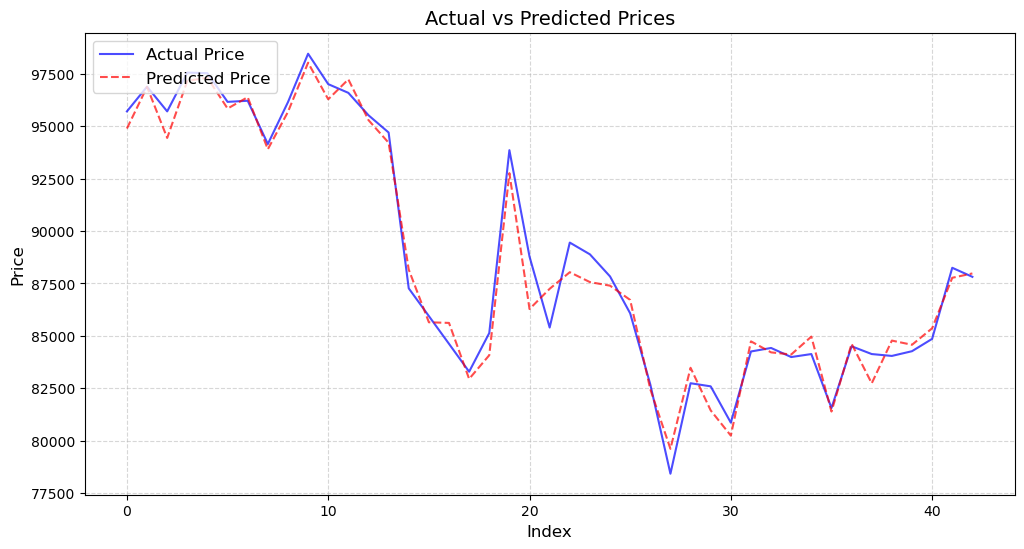

In [17]:
import matplotlib.pyplot as plt

# Set figure size for better readability
plt.figure(figsize=(12, 6))

# Plot actual prices with a smoother line
plt.plot(results_df['Actual Price'], label='Actual Price', linestyle='solid', color='blue', alpha=0.7)

# Plot predicted prices with a dashed line
plt.plot(results_df['Predicted Price'], label='Predicted Price', linestyle='dashed', color='red', markersize=4, alpha=0.7)

# Set labels and title
plt.xlabel("Index", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title("Actual vs Predicted Prices", fontsize=14)

# Enable grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Add a legend with better positioning
plt.legend(fontsize=12, loc="upper left")

# Display the plot
plt.show()


In [18]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_rescaled = y_pred_rescaled.flatten()  # Flatten to ensure it's a 1D array
y_test_rescaled = y_test_rescaled.flatten()  # Flatten to ensure it's a 1D array

# Calculate MSE, RMSE, MAE, and R-squared
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

In [19]:
# Print the metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 707821.9624626671
Root Mean Squared Error (RMSE): 841.3215571127766
Mean Absolute Error (MAE): 667.4534482558419
R-squared (R²): 0.9789379392587824
